In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile, TH1D
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import simps,trapz
%matplotlib inline

In [2]:
f = TFile("numode_bnb_470m_r200.root")

flux_pot = 1. #e+20
sample_pot = 2.42 #e+20
cosmic_pot = 1.90 #e+20

numu = f.Get("numu")
numu = TH1D(numu)
numu.Scale(sample_pot/flux_pot)
int_flux = numu.Integral(10,41)
mean = numu.GetMean() 
mean = 0.9818 # From TheFlux script
#numu.Scale(cosmic_pot) #/sample_pot)
#cosmic_flux = numu.Integral()

flux_v = rn.hist2array(hist=numu)
energy = np.arange(0.5,2.05,0.05)
#print energy
#energy = np.linspace(0.,10,200)
#print len(energy)

#int_flux_old = simps(flux_v[10:41], energy) #/ flux_pot * sample_pot
#cosmic_flux = int_flux / sample_pot * cosmic_pot
#print "OLD BNB SAMPLE: %.3e " % int_flux_old

print("BNB Only Flux: {:.3e} at mean energy: {:.2f} MeV".format(int_flux,mean*1000))
#print("Cosmic BNB Flux: {:.3e}".format(cosmic_flux))
print "Mean energy: ", numu.GetMean()

BNB Only Flux: 1.279e+11 at mean energy: 981.80 MeV
Mean energy:  0.823394183753


In [3]:
tot_flux = np.cumsum(flux_v)[-1]

print tot_flux / 1e+9
run_sum = 0
for i in xrange(len(flux_v)): 
    if run_sum > tot_flux/2:
        break
    run_sum += flux_v[i]

#print energy[i-1], energy[i]
e = (energy[i-1] + energy[i])/2
print e

173.741579833
1.225


FLUX : 5.81e+09
FLUX : 1.20e+11


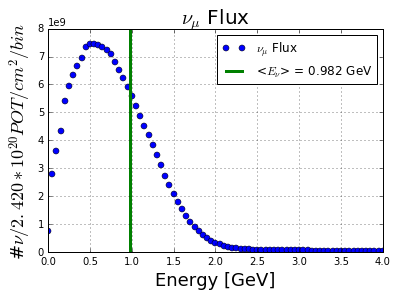

In [4]:
# Check whether or not this is the scaled flux
energy_plot = np.arange(0.,10,0.05)
plt.figure()
plt.plot(energy_plot,flux_v,'bo',label="$\\nu_\mu$ Flux")
plt.grid(True)#,which='both')
plt.xlabel("Energy [GeV]",fontsize=18)
plt.ylabel("#$\\nu /%.3f * 10^{20} POT / cm^2/bin$" % sample_pot,fontsize=18)
plt.title("$\\nu_\mu$ Flux",fontsize=20)
plt.axvline(mean,color='g',lw=3,label = "<$E_\\nu$> = %.3f GeV"%mean)
plt.legend()
plt.savefig("numu_flux.png")
plt.xlim(0,4)

trap_area = 0
erf = 0
for i in xrange(len(flux_v[10:40])-1):
    erf += flux_v[10 + i]
    trap_area += (flux_v[10 + i] + flux_v[10 + i+1]) / 2 * 0.05 

print "FLUX : %.2e" % trap_area 
print "FLUX : %.2e" % erf 

(0, 13)

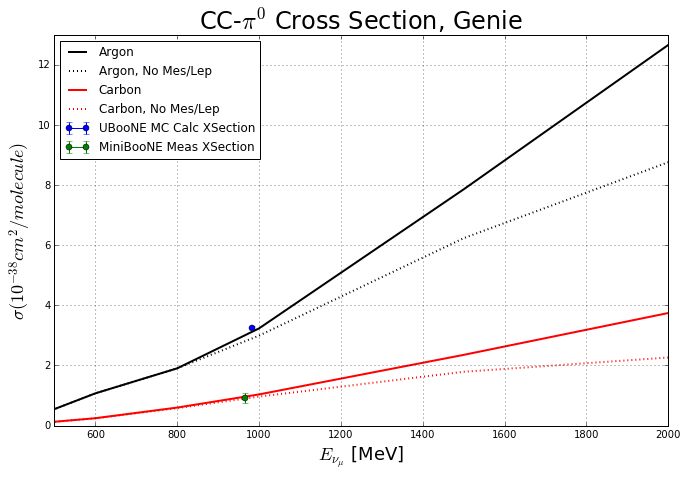

In [8]:
ar = [0, 0, 0, 0, 0, 0.0229093, 1.0723, 1.90449, 3.23396, 7.86106, 12.667, 17.1546, 22.4787, 32.5825, 42.9095, 97.1394, 282.666]
ar_nomes = [0, 0, 0, 0, 0, 0.0229093, 1.0723, 1.90449, 2.99262, 6.23519, 8.76319, 10.0212, 12.2872, 14.6504, 15.5506, 18.9289,21.1592]
car = [0, 0, 0, 0, 0.00861061, 0.244294, 0.598569, 1.03631, 2.35223, 3.74506]
car_nomes = [0, 0, 0, 0, 0.00861061, 0.241255, 0.579511, 0.963606, 1.79008, 2.2646]

ar_e = [100, 150, 200, 250, 300, 400, 600, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 10000,30000]
ca_e = [150, 200, 250, 300, 400, 600, 800, 1000, 1500, 2000]

uboone_e = [981.8]
uboone_xsec = [3.25]
minib_e = [965]
minib_xsec = [.92]

plt.figure(figsize=(11,7))
plt.plot(ar_e,ar,'k-',label = "Argon",lw=2)
plt.plot(ar_e,ar_nomes,'k:',label = "Argon, No Mes/Lep",lw=2)
plt.plot(ca_e,car,'r-',label = "Carbon",lw=2)
plt.plot(ca_e,car_nomes,'r:',label = "Carbon, No Mes/Lep",lw=2)
plt.errorbar(uboone_e,uboone_xsec,yerr=0.05,fmt='-o',label='UBooNE MC Calc XSection') #,'bo',
plt.errorbar(minib_e,minib_xsec,yerr=.18,fmt='-o',label='MiniBooNE Meas XSection') #,'bo',
#plt.errorbar(uboone_e,3.57,yerr=0.34,fmt='-o',label='UBooNE MC-calc XSection, BNB+Cosmic') #,'bo',
plt.grid(True)#,which='both')
plt.legend(loc=2)
plt.xlabel("$E_{\\nu_\mu}$ [MeV]",fontsize=18)
plt.ylabel("$\\sigma (10^{-38} cm^2/molecule)$",fontsize=18)
plt.title("CC-$\\pi^0$ Cross Section, Genie",fontsize=24)
plt.xlim(500,2000)
plt.ylim(0,13)
#plt.savefig("GenieTruth.png")

In [20]:
weight = [ car_nomes[4+i] * (ca_e[4+i+1] - ca_e[4+i] )/ 1600 for i in xrange(len(car_nomes[4:11])-1)]


weight2 = [ ar_nomes[5+i] * (ar_e[5+i+1] - ar_e[5+i] )/ 1600 for i in xrange(len(ar_nomes[4:11])-1)]



print np.cumsum(weight)[-1],np.cumsum(weight2)[-1]

0.96419895125 5.9971499125


In [46]:
def getXSection(N_sig,N_bkgd,N_targ,eff,flux):
    
    xsec = float(N_sig - N_bkgd)/(N_targ * eff * flux)
    return xsec

In [141]:
N_sig = 3495
N_bkgd = 0
N_targ = 3.584e+31
eff = 1.
flux = int_flux

xsec = getXSection(N_sig,N_bkgd,N_targ,eff,int_flux)

print("Cross section is {:.2e}".format(xsec))
print("With average energy {:.2f} [MeV]".format(823.4))

Cross section is 5.61e-40
With average energy 823.40 [MeV]


In [53]:
import math
1./math.sqrt(3496) * 3.25

0.05496644493370374

In [79]:
3.25 / 3496 * 3200

2.9748283752860414